---

#  mplfinance: price-movement plots

---

Price-movement, or price-based, plots focus on plotting price movements that are above some minimal movement threshold or size. As such, price-movement plots "ignore" time or, really, more correctly, they allow the time axis to be compressed or exanded as defined by the price movements. In other words, the x-axis is not linear with time, and each unit along the x-axis can represent a different amount of time compared with other units along the same x-axis. This is because each unit is defined by a specific size of price movement, and regardless of the amount of time it took to make that price movement.

There are several common types of price-movement based charts, including 'Renko', 'Point and Figure', 'Heiken-Ashi', 'Kagi', and 'Line Break'. At present, mplfinance support 'Renko' and 'Point and Figure' (see below).

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for SPY from 2011 to 2012

In [3]:
daily = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [4]:
import mplfinance as mpf

# Create a price-movement plot
There are two different types of price movement plots that can be created with the `plot()` function, Renko (`type='renko'`) and Point & Figure (`type='pf'`).

### For `type='renko'`, you may specify arguments in `renko_params`:

- **`brick_size`**
    - Can be either an integer/float or 'atr'
        - By specifying an integer or float you are setting each brick/box to be that value
        - Setting `brick_size='atr'` means the `brick_size` will be set to the Average True Value over the specified `atr_length`
    - `brick_size=2` means for a renko brick to be created the price must move at least a value of 2.
    - Default if no `brick_size` is specified is 'atr'
- **`atr_length`**
    - Can be either an integer or 'total'
    - Represents the time period over which to calculate the Average True Value
        - if `atr_length='total'` then ATR will be calculated over the entire dataset
    - If `brick_size` is not 'atr' then setting `atr_length` has no effect on the plot
    - Default if no `atr_length` is specified is 14

### For `type='pnf'`, you may specify arguments in `pointnfig_params`:

- **`box_size`**
    - Can be either an integer/float or 'atr'
        - By specifying an integer or float you are setting each brick/box to be that value
        - Setting `box_size='atr'` means the `box_size` will be set to the Average True Value over the specified `atr_length`
    - `box_size=2` means for a X or an O to be created the price must move at least a value of 2.
    - Default if no `box_size` is specified is 'atr'
- **`atr_length`**
    - Integer representing the time period over which to calculate the Average True Value
    - If `box_size` is not 'atr' then setting `atr_length` has no effect on the plot
    - Default if no `atr_length` is specified is 14

Note: `renko_params` and `pointnfig_params` must be passed in as a `dict`

---

### We can create a simple renko chart by setting the `type='renko'`  
 - This example uses the default values for `brick_size` ('atr') and `atr_length` (14).  This means the outputted plot sets the `brick_size` to the Average True Range over the last 14 datapoints.

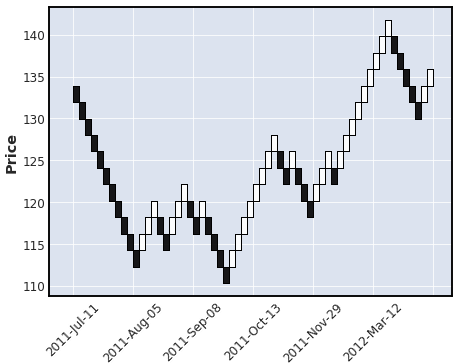

In [16]:
mpf.plot(daily,type='renko')

### We can also create a simple Point and Figure chart by setting the `type='pnf'` or alternatively `type='p&f'` or `type='pointnfigure'`

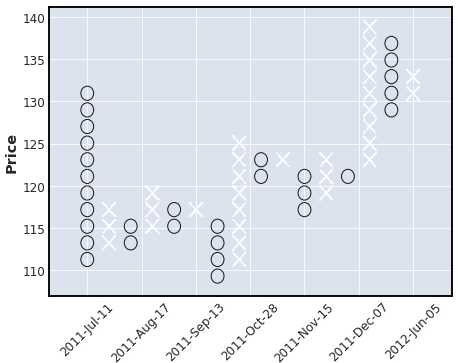

In [17]:
mpf.plot(daily,type='pnf')

### We can see how price movement plots eliminate noise compared to a line plot of the same data

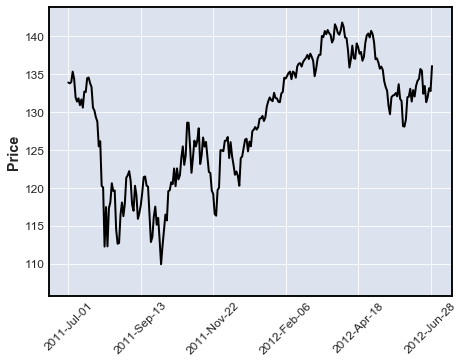

In [7]:
mpf.plot(daily, type='line')

---

### We can adjust the brick size for the Renko charts by specifying integer or float values
- Notice how the distance between each date varies

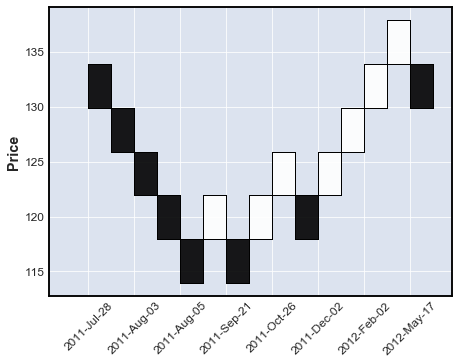

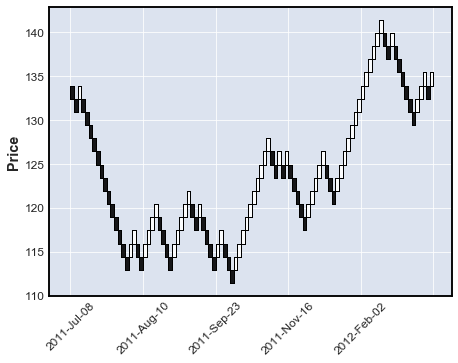

In [8]:
mpf.plot(daily,type='renko',renko_params=dict(brick_size=4))
mpf.plot(daily,type='renko',renko_params=dict(brick_size=1.5))

### Similarly, we can also see this difference with the Point and Figure charts
- Notice how the arguments differ

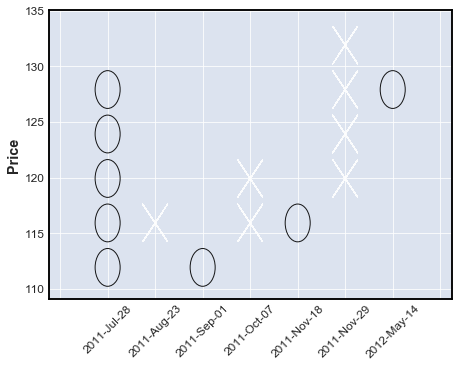

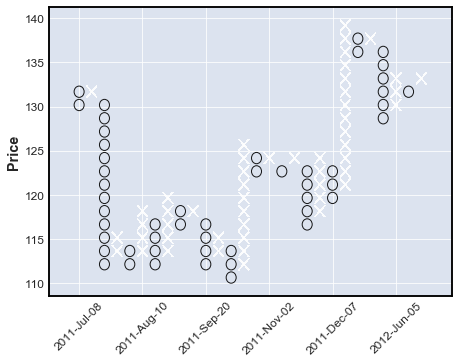

In [9]:
mpf.plot(daily,type='p&f',pointnfig_params=dict(box_size=4))
mpf.plot(daily,type='p&f',pointnfig_params=dict(box_size=1.5))

---

### By default, when `brick_size='atr'` and `box_size='atr'`, the atr_length is 14, but we can change this by specifying `atr_length`

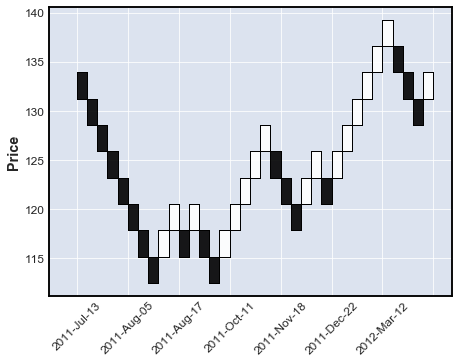

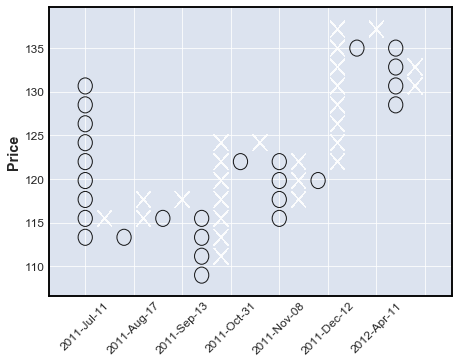

In [15]:
mpf.plot(daily,type='renko',renko_params=dict(brick_size='atr', atr_length=2))
mpf.plot(daily,type='pointnfigure',pointnfig_params=dict(box_size='atr', atr_length=2))

---
## ----------------------------------------------------------
# Using other plot functionalities with price movement charts

- Passing in data to the `addplot` argument will have no impact on the outputed plot as this feature is not supported
- It is also possible to customize the colors of price movement plots, show volume, and the moving average (mav).

In [11]:
# First we set the kwargs that we will use for the style examples:
renko_kwargs = dict(type='renko',mav=(8,20,30), volume=True,figratio=(10,8),figscale=0.75)
pnf_kwargs = dict(type='pnf',mav=(4,6,8), volume=True,figratio=(10,8),figscale=0.75)

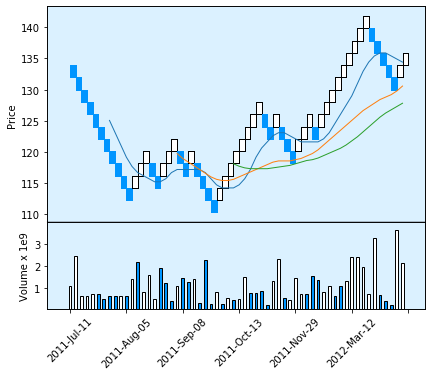

In [12]:
mpf.plot(daily,**renko_kwargs,style='blueskies')

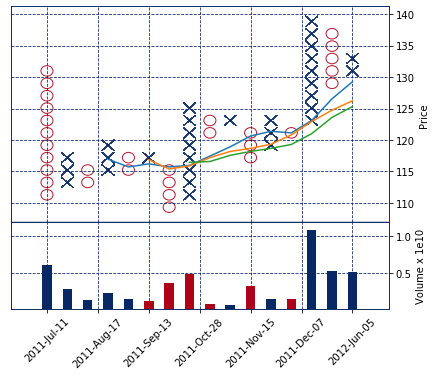

In [13]:
mpf.plot(daily,**pnf_kwargs,style='starsandstripes')

---

- for Renko charts within `marketcolors` one can specify colors for the `edges` and `up` and `down` brick colors.
- for Point & Figure plots within `marketcolors` one can specify colors for the `up` Xs and the `down` Os.

for example:

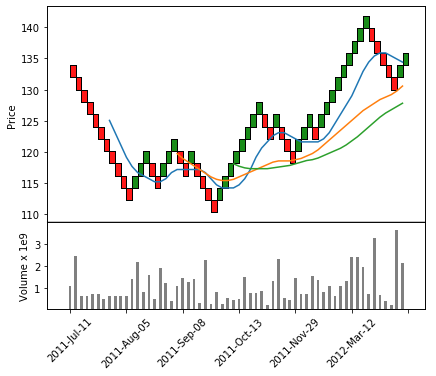

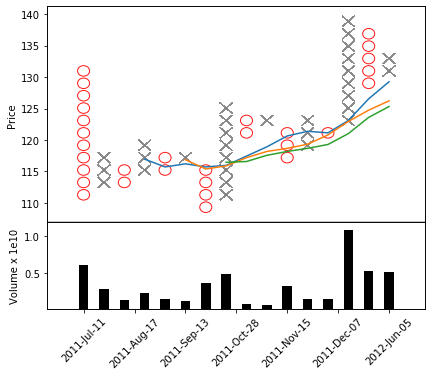

In [14]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           volume='gray')
s  = mpf.make_mpf_style(marketcolors=mc)

mc2 = mpf.make_marketcolors(up='gray',down='r',
                           volume='black')
s2  = mpf.make_mpf_style(marketcolors=mc2)

mpf.plot(daily,**renko_kwargs,style=s)
mpf.plot(daily,**pnf_kwargs, style=s2)